In [2]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph
graph = ChemicalSpaceGraph.from_file('../cache.h5', '../cache.p')

In [3]:
len(graph.edges)

840456

In [4]:
import pandas as pd

In [8]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])

In [10]:
edges.describe()

,2
count,840456.000000
mean,0.035487
std,0.046482
min,-0.002402
25%,-0.000817
50%,0.025084
75%,0.056065
max,0.769115


In [14]:
e1s = edges[edges[2] > 0.5]

In [15]:
e1s

,0,1,2
247158,Cc1nc2c[nH]c(=O)cc2o1,Cc1nc2cc(=O)[nH]cc2o1,0.545265
261133,Cn1cnc2ccc(=O)oc21,Cn1cnc2oc(=O)ccc21,0.538239
385221,O=c1[nH]c(-c2ccc[nH]2)co1,O=c1[nH]cc(-c2ccc[nH]2)o1,0.555404
484716,c1cc(Nc2cocn2)co1,c1cc(Nc2cnco2)co1,0.769115
489615,Cc1ncn2c(=O)occc12,Cc1coc(=O)c2nccn12,0.545265
542396,O=c1[nH]cc(-c2cc[nH]c2)o1,O=c1[nH]c(-c2cc[nH]c2)co1,0.666553
629583,Cc1c[nH]c(=O)c2ocnc12,Cc1coc(=O)c2[nH]ncc12,0.555404
698473,Cn1ncc2occc2c1=O,Cn1c(=O)ccc2oncc21,0.545270
706315,Cn1ccc2c(=O)ocnc21,Cc1cc2c(=O)ocnc2[nH]1,0.545265
837039,Cc1c[nH]c(=O)c2ncoc12,Cc1coc2c(=O)[nH]ncc12,0.555404


In [27]:
from matplotlib import pyplot as plt
import numpy as np

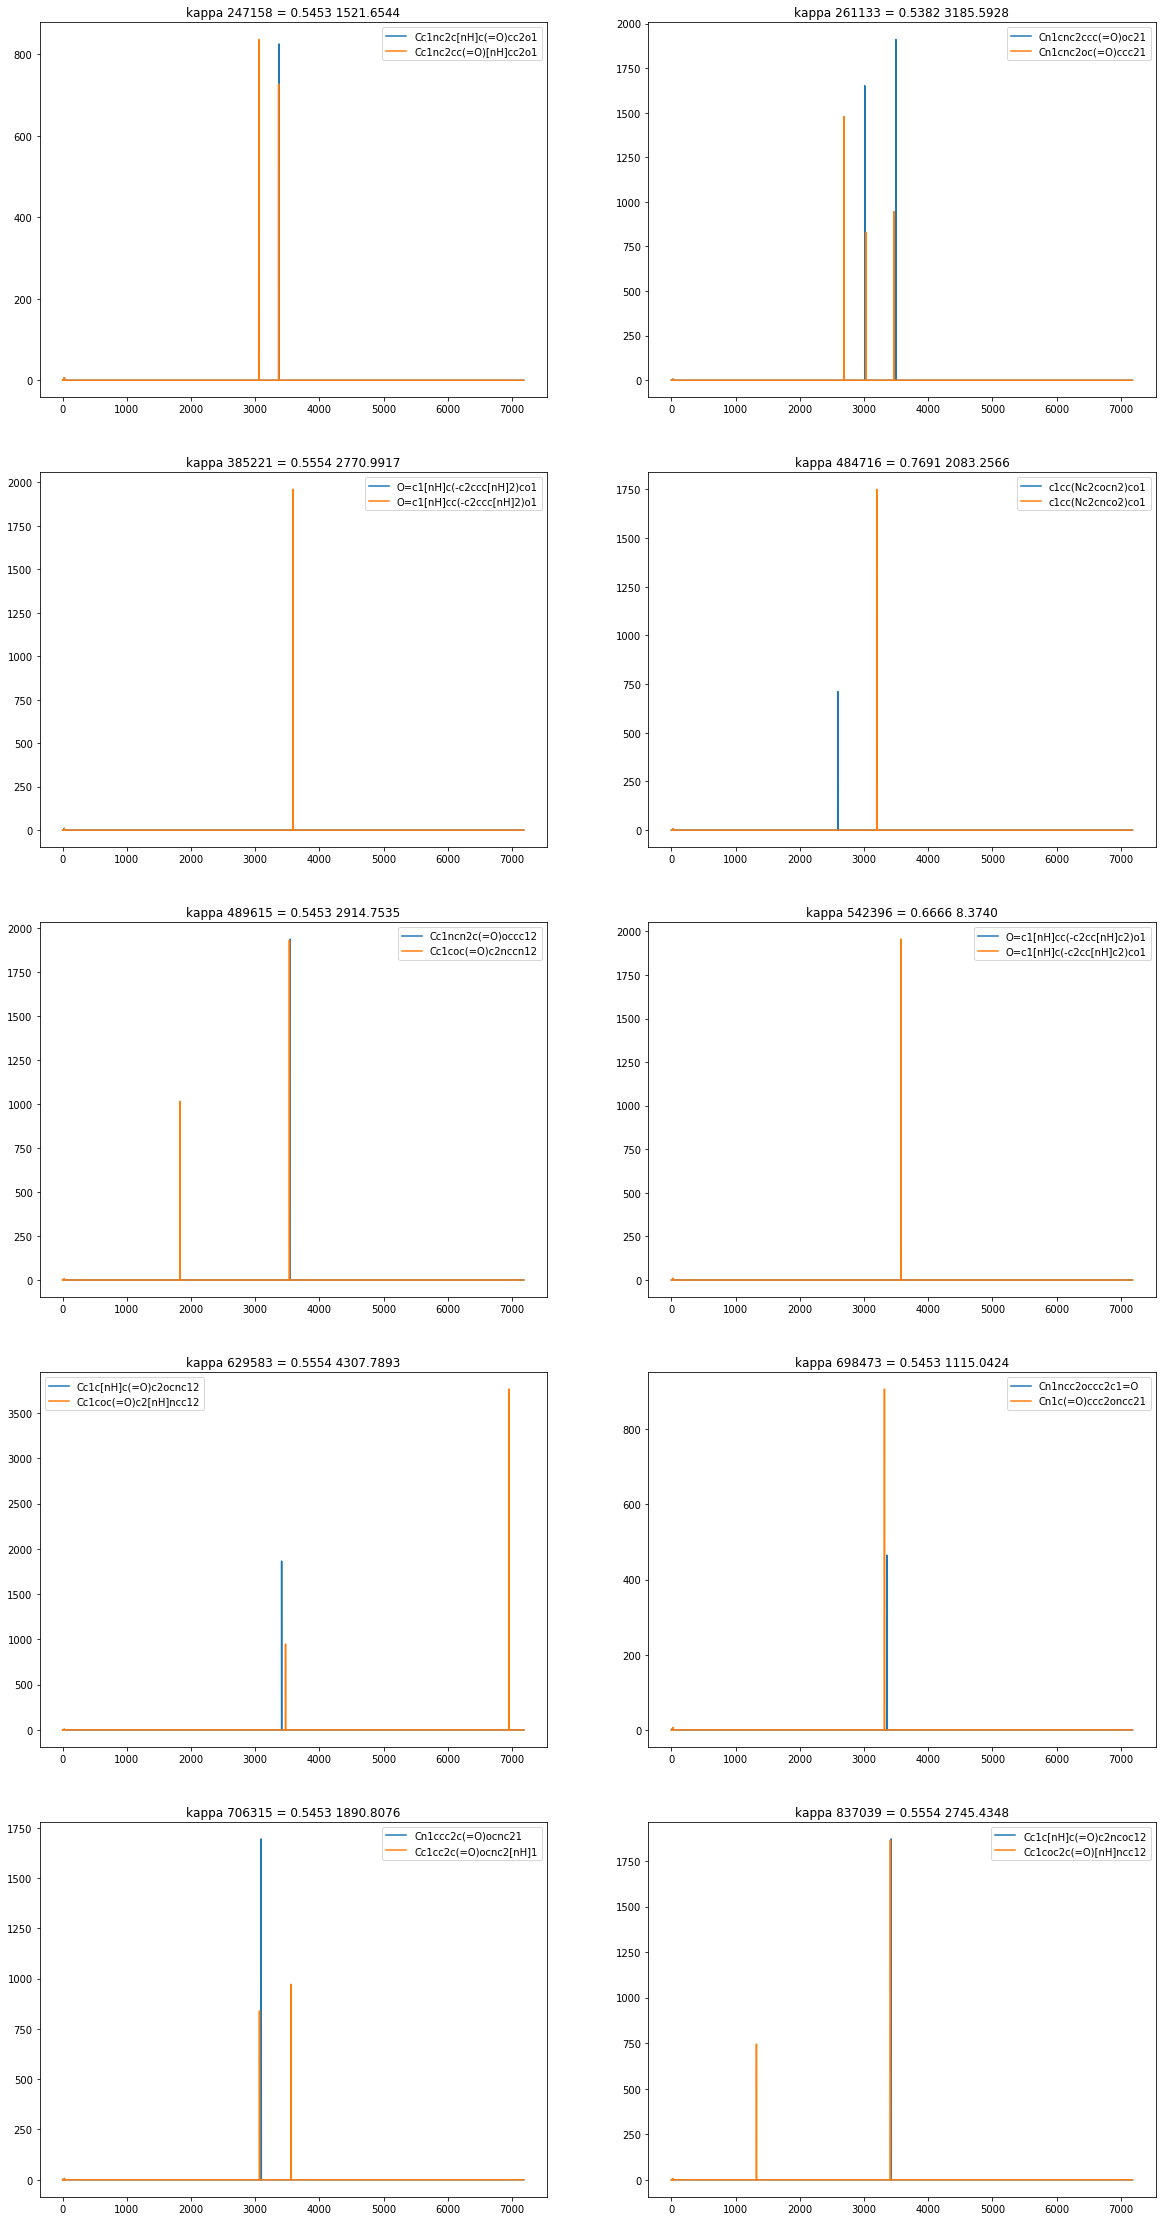

In [41]:
x = np.arange(len(graph.fingerprints_df['Cc1nc2c[nH]c(=O)cc2o1']))
plt.rcParams["figure.figsize"] = (20,40)
for i, (index, row) in enumerate(e1s.iterrows()):
    plt.subplot(5, 2, i+1)
    y1 = graph.fingerprints_df[row[0]]
    y2 = graph.fingerprints_df[row[1]]
    plt.title('kappa %d = %.4f %.4f' % (index, row[2], np.linalg.norm(y1-y2)))
    plt.plot(x, y1, label=row[0])
    plt.plot(x, y2, label=row[1])
    plt.legend()

In [32]:
next(e1s.iterrows())[1][1]

'Cc1nc2cc(=O)[nH]cc2o1'

In [38]:
f1 = graph.fingerprints_df['O=c1[nH]cc(-c2cc[nH]c2)o1']
f1[f1>0]

20         4.729022
23         5.394149
24         5.749808
26         6.234796
3579    1954.751806
Name: O=c1[nH]cc(-c2cc[nH]c2)o1, dtype: float64

In [40]:
f2 = graph.fingerprints_df['O=c1[nH]c(-c2cc[nH]c2)co1']
f2[f2>0]

20         4.743649
23        10.968437
24         5.747498
3579    1955.174695
Name: O=c1[nH]c(-c2cc[nH]c2)co1, dtype: float64

In [47]:
nmr_old, ir_old = load_data('../data/sample/m150_nmr.p', '../data/sample/m150_ir.p')

In [49]:
nmrs = [NMRVector.from_old(x) for x in nmr_old]

In [50]:
irs = [IRVector.from_old(ir_old, x.smiles) for x in nmrs if x.smiles in ir_old.data]

In [65]:
def show_spectra(smiles):
    nmr = [x for x in nmrs if x.smiles == smiles][0]
    plt.subplot(1, 2, 1)
    nmr_x = np.arange(len(nmr.data), dtype=float) * nmr.bin_width
    plt.plot(nmr_x, nmr.data, label='NMR: %s' % smiles)
    plt.subplot(1, 2, 2)
    ir = [x for x in irs if x.smiles == smiles][0]
    ir_x = np.arange(len(ir.data), dtype=float) * ir.bin_width
    plt.plot(ir_x, ir.data, label='IR: %s' % smiles)
    return nmr, ir

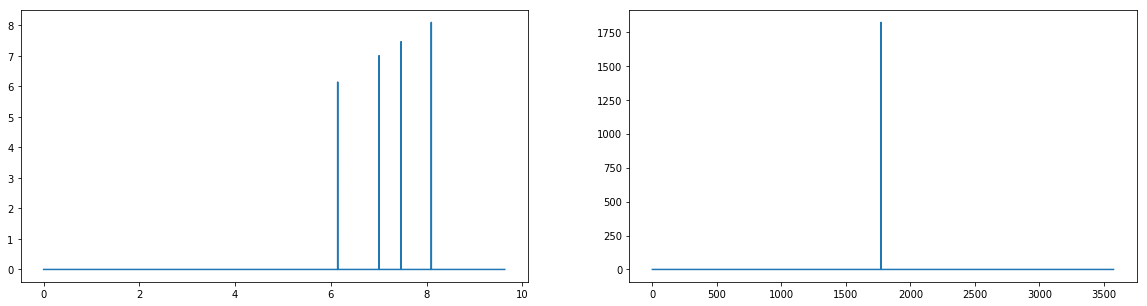

In [66]:
plt.rcParams["figure.figsize"] = (20,5)
nmr, ir = show_spectra('O=c1[nH]cc(-c2cc[nH]c2)o1')

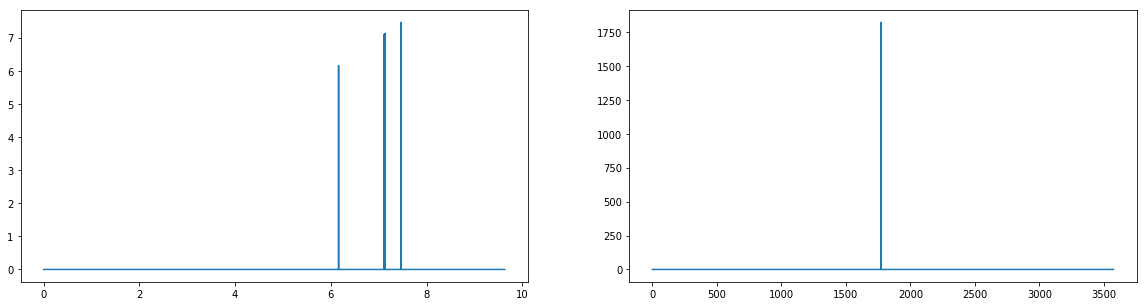

In [67]:
nmr2, ir2 = show_spectra('O=c1[nH]c(-c2cc[nH]c2)co1')

In [71]:
np.arange(len(nmr.data)) * nmr.bin_width

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.632e+00, 9.633e+00,
       9.634e+00])